In [10]:
import os

import cv2 as cv
import pytesseract



from PIL import Image



pytesseract.pytesseract.tesseract_cmd = (
    r"C:\Users\Nutthawoot\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"
)


import numpy as np


import pandas as pd

In [11]:
# Get the list of all files in the screenshot directory
files = os.listdir("screenshots")

# sorted(files)
img_list = [
    os.path.join(os.curdir, "screenshots", img)
    for img in files
    if img.startswith("Scr")
]
img_list.sort()
img_list

['.\\screenshots\\Screenshot_20240423_233750_com.devsisters.ck.jpg',
 '.\\screenshots\\Screenshot_20240423_233756_com.devsisters.ck.jpg',
 '.\\screenshots\\Screenshot_20240423_233807_com.devsisters.ck.jpg',
 '.\\screenshots\\Screenshot_20240423_233814_com.devsisters.ck.jpg',
 '.\\screenshots\\Screenshot_20240423_233820_com.devsisters.ck.jpg',
 '.\\screenshots\\Screenshot_20240423_233826_com.devsisters.ck.jpg']

In [12]:
def list_all_screenshots(path: str) -> list:
    """list_all_screenshots _summary_

    _extended_summary_

    :param path: _description_
    :type path: str
    :return: list of path to screenshots in the directory
    :rtype: list
    """

    # Get the list of all files in the screenshot directory
    files = os.listdir(path)

    # filter only screenshot files and keep them into a list
    scrshot_list = [
        os.path.join(os.curdir, path, scrshot)
        for scrshot in files
        if scrshot.startswith("Scr")
    ]
    scrshot_list.sort()
    print(f"{len(scrshot_list)} screenshots were found.\n{scrshot_list}")
    return scrshot_list

In [13]:
img_list = list_all_screenshots("screenshots")

list(map(lambda x: Image.open(x).size, img_list))

6 screenshots were found.
['.\\screenshots\\Screenshot_20240423_233750_com.devsisters.ck.jpg', '.\\screenshots\\Screenshot_20240423_233756_com.devsisters.ck.jpg', '.\\screenshots\\Screenshot_20240423_233807_com.devsisters.ck.jpg', '.\\screenshots\\Screenshot_20240423_233814_com.devsisters.ck.jpg', '.\\screenshots\\Screenshot_20240423_233820_com.devsisters.ck.jpg', '.\\screenshots\\Screenshot_20240423_233826_com.devsisters.ck.jpg']


[(2340, 1080),
 (2340, 1080),
 (2340, 1080),
 (2340, 1080),
 (2340, 1080),
 (2340, 1080)]

In [17]:
def crop_image(image_path: str):
    """crop_image
    Crop the area from a screenshot image for OCR.
    Source image dimension must be 2340 x 1080 pixel
    CROP_AREA = (638, 558, 1756, 886)
    :param image_path: Path to a source image
    :type image_path: str
    :return: A cropped image
    :rtype: Image | None
    """

    REQUIRED_SIZE = (2340, 1080)

    # Assuming the crop areas are given as (left, upper, right, lower)

    # CROP_AREA = (585, 559, 1685, 910)

    CROP_AREA = (638, 558, 1756, 886)

    # Load the image

    img = Image.open(image_path)  # type: ignore

    if img.size == REQUIRED_SIZE:

        return img.crop(CROP_AREA)

    else:
        print(

            f"The size of the image is {img.size}, which does not match the required size (2340, 1080)."
        )



def get_grayscale(image):


    return cv.cvtColor(image, cv.COLOR_BGR2GRAY)



def get_binary(image):


    (thresh, blackAndWhiteImage) = cv.threshold(image, 100, 255, cv.THRESH_BINARY)

    return blackAndWhiteImage

In [18]:
crop_img = crop_image(image_path=img_list[0])
crop_img.info["dpi"]  # type: ignore

AttributeError: type object 'Image' has no attribute 'open'

In [16]:
# Print the files
crop_img_list = []
for img_path in img_list:
    crop_img = crop_image(image_path=img_path)
    crop_img_list.append(crop_img)
crop_img_list

[<PIL.Image.Image image mode=RGB size=1118x328>,
 <PIL.Image.Image image mode=RGB size=1118x328>,
 <PIL.Image.Image image mode=RGB size=1118x328>,
 <PIL.Image.Image image mode=RGB size=1118x328>,
 <PIL.Image.Image image mode=RGB size=1118x328>,
 <PIL.Image.Image image mode=RGB size=1118x328>]

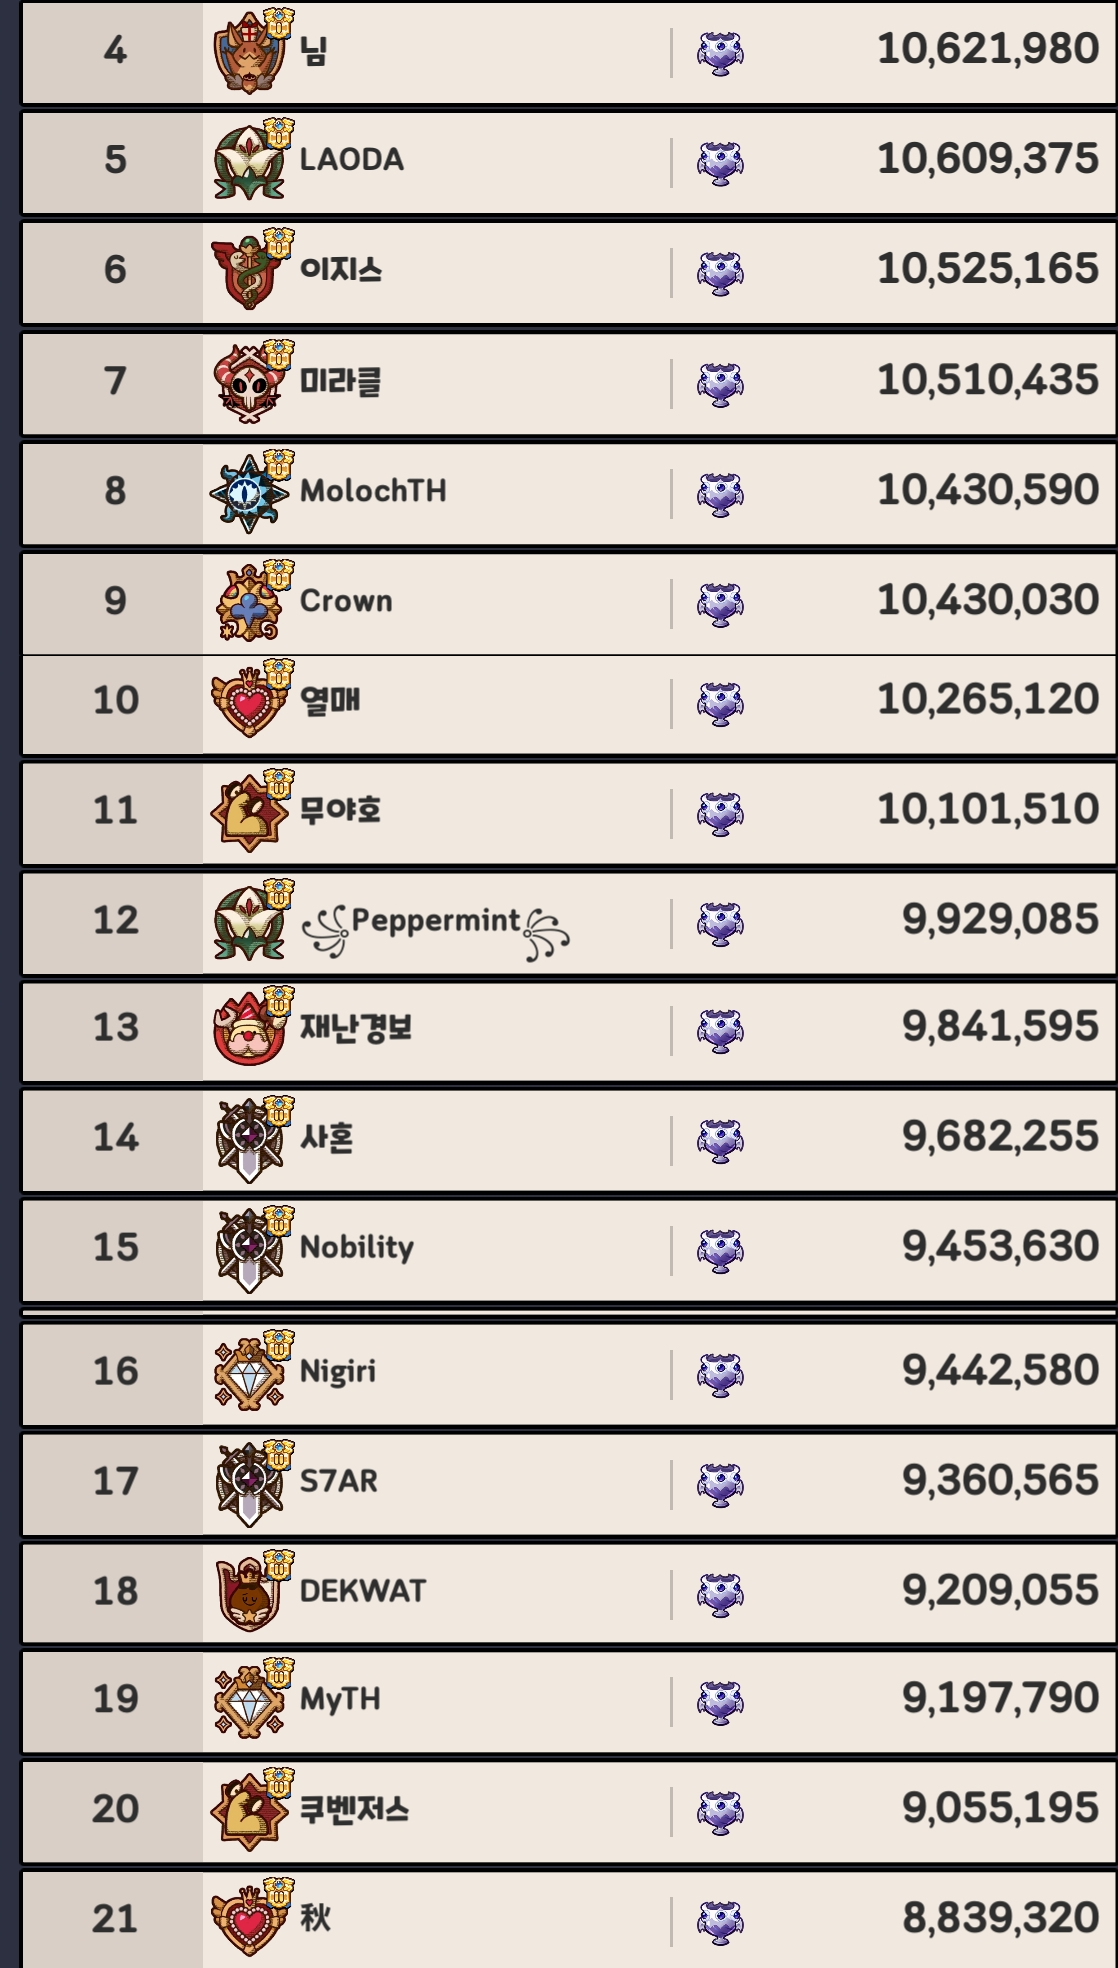

In [17]:
# Create a new image with a width that is the sum of individual image widths
# and a height of the tallest image
max_width = max(image.width for image in crop_img_list)
total_height = sum(image.height for image in crop_img_list)
final_image = Image.new("RGB", (max_width, total_height)) # type: ignore

# Paste the images into the final image
y_offset = 0
for image in crop_img_list:
    final_image.paste(image, (0, y_offset))
    y_offset += image.height

final_image

In [9]:
# Save the final image
path_save = os.path.join(os.curdir, "screenshots", "final_3-1.jpg")
final_image.save(path_save)

In [18]:
# Use Tesseract to do OCR on the image
text = pytesseract.image_to_string(final_image, lang="eng+kor", config="--psm 1")

# Split the text by lines and then by words to create a list of lists
data = [line for line in text.split("\n") if line]

In [19]:
text

'B 10,621,980\n\nale\n\nB 10,609,375\n\no\n2\n결\nI>\n\nQB 10,525,165\n\n7 | 10,510,435\n\n라 8\nMolochTH 8 10,430,590\n\n8\n9 10,430,030\n\n1\n\n10,265,120\n\nSo\n0 oS\n2 i\noS\n\n열매\na\nTr\n\n;\n\n1 9,929,085\n\nPeppermint\n2000 >\n\n|\n&\n\nray\nw\n\n고 2\nTio re\non\nHr\n\n9,841,595\n\n14 I B 9,682,255\n15 8 9,453,630\n\n16 Nigiri B 9,442,580\n\nSe\n\n21 @ x 8,839,320\n\nNobility\n\nge\n\n'

In [21]:
data

['B 10,621,980',
 'ale',
 'B 10,609,375',
 'o',
 '2',
 '결',
 'I>',
 'QB 10,525,165',
 '7 | 10,510,435',
 '라 8',
 'MolochTH 8 10,430,590',
 '8',
 '9 10,430,030',
 '1',
 '10,265,120',
 'So',
 '0 oS',
 '2 i',
 'oS',
 '열매',
 'a',
 'Tr',
 ';',
 '1 9,929,085',
 'Peppermint',
 '2000 >',
 '|',
 '&',
 'ray',
 'w',
 '고 2',
 'Tio re',
 'on',
 'Hr',
 '9,841,595',
 '14 I B 9,682,255',
 '15 8 9,453,630',
 '16 Nigiri B 9,442,580',
 'Se',
 '21 @ x 8,839,320',
 'Nobility',
 'ge']

In [ ]:

# Load the image from file
img = Image.open("your_image.png") # type: ignore

# Use Tesseract to do OCR on the image
text = pytesseract.image_to_string(img, lang='eng+kor')

# Split the text by lines and then by words to create a list of lists
data = [line.split() for line in text.split('\n') if line]

# Create a DataFrame from the extracted data
df = pd.DataFrame(data, columns=['Column1', 'Column2', 'Column3', 'Column4'])

# Display the DataFrame
print(df)


crop_area=(560, 560, 1700, 915)


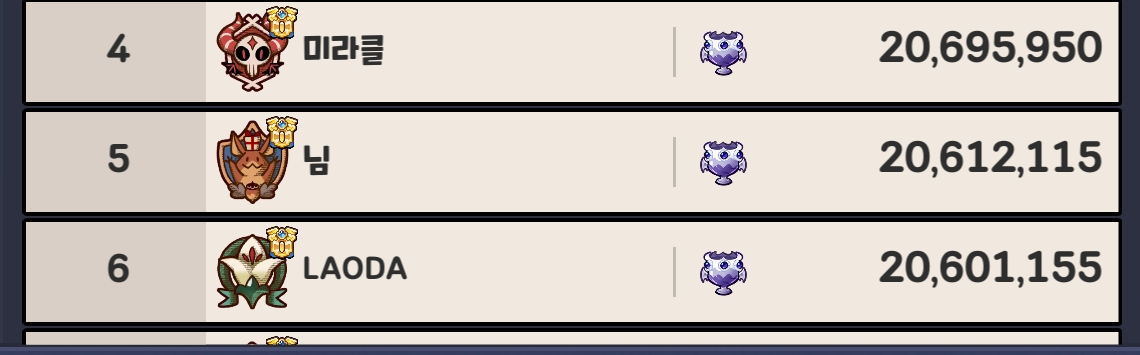

In [4]:
upper = 560
lower = 915
left = 560
right = 1700
# Define the area to be cropped (left, upper, right, lower)
crop_area = (left, upper, right, lower)
print(f"{crop_area=}")
# Crop the image
img_cropped = img.crop(crop_area)
# Display the cropped image
img_cropped

crop_area_topthree=(560, 230, 1700, 400)


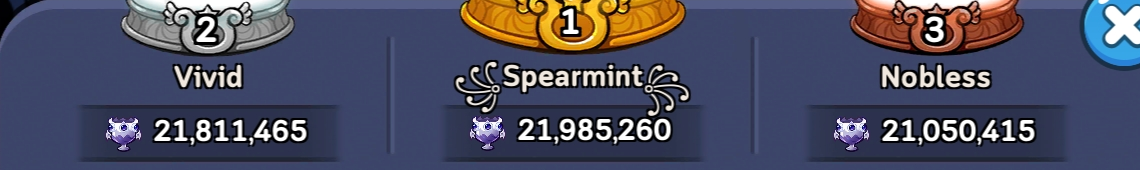

In [5]:
upper = 230
lower = 400
left = 560
right = 1700
# Define the area to be cropped (left, upper, right, lower)
crop_area_topthree = (left, upper, right, lower)
print(f"{crop_area_topthree=}")
# Crop the image
img_cropped_topthree = img.crop(crop_area_topthree)
# Display the cropped image
img_cropped_topthree

In [6]:
# Perform OCR on the cropped image

text = pytesseract.image_to_string(img_cropped_topthree)

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.